In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from fuzzywuzzy import fuzz
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster


/opt/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_excel("/Users/mollyrudisill/Voxcroft/20240603_1651_GF SA Safety_Last30Days.xlsx")

In [3]:
def collect_all_words(df, columns):
    # Initialize an empty list to store words
    all_words = []
    
    # Iterate over each specified column
    for column in columns:
        # Iterate over each value in the specified column
        for value in df[column]:
            # Check if the value is a string
            if isinstance(value, str):
                # Split the value by "|" and extend the list with the words
                words = value.split("|")
                all_words.extend(words)
    
    return all_words

wordswords = collect_all_words(df, ["Article_Content_People_AI_Model"])
wordswords

['Nicole Chinsamy',
 'Nicole Chinsamy',
 'Nicole Chinsamy',
 'Nicole Chinsamy',
 'Nicole Chinsamy',
 'Penny Holburn',
 'Tyla',
 'Tyla',
 'Emtee',
 'Tyla',
 'Nota Baloyi',
 "Nota Baloyi's",
 'Сheck',
 'Nicole Chinsamy',
 'Marc Andrew',
 'Marc Andrew Marc Andrew',
 'Marc',
 'Cyril Ramaphosa',
 'Nelson Mandela Bay',
 'Ramaphosa',
 'Ramaphosa',
 'Ramaphosa',
 'Zanele Mbokazi',
 'Zanele Mbokazi',
 'Zanele Mbokazi',
 'Zanele Mbokazi',
 'Zanele Mbokazi',
 'Mpendulo Nkambule',
 'ZiMoja',
 'Mbokazi',
 'Zanele',
 'Sinenjabulo Mdluli',
 'Thinah Zungu',
 'Thinah Zungu',
 'Сheck',
 'Yoo lapho',
 'Thabo TBO',
 'Liso Jacobs',
 'Olly',
 'Latoya Butale',
 'Sesethu',
 'Nooooooand',
 '@babymesh0',
 'Bill Using',
 'Thato Sikwane',
 'Instagram',
 'Shaz',
 'yi baddieeee kufuneka uveze',
 'noba kuyabanda',
 'Unobu Diddy nyana',
 'Cassper Nyovest',
 'Bontle Modiselle NBA',
 'Cyril Ramaphosa',
 'Fikile Mbalula',
 'Ramaphosa',
 'Jacob Zuma',
 'Zuma',
 'Ramaphosa',
 'Zuma',
 'Ramaphosa',
 'Cyril Ramaphosa',
 'Gw

In [4]:

first_1000_elements = wordswords[:1000]
print(first_1000_elements[:10])


['Nicole Chinsamy', 'Nicole Chinsamy', 'Nicole Chinsamy', 'Nicole Chinsamy', 'Nicole Chinsamy', 'Penny Holburn', 'Tyla', 'Tyla', 'Emtee', 'Tyla']


In [5]:
clusterdf = pd.DataFrame(first_1000_elements, columns=['Name'])

# Ensure the list of names is properly handled
clusterdf['Name'] = clusterdf['Name'].astype(str)

# Function to calculate distance matrix using fuzzy string matching, considering partial matches
def calculate_distance_matrix(strings):
    n = len(strings)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            # Calculate similarity using fuzz.ratio
            full_ratio = fuzz.ratio(strings[i], strings[j])
            # Calculate partial ratios (first name and last name comparisons)
            partial_ratio1 = fuzz.partial_ratio(strings[i].split()[0], strings[j])
            partial_ratio2 = fuzz.partial_ratio(strings[i], strings[j].split()[0])
            partial_ratio3 = fuzz.partial_ratio(strings[i].split()[-1], strings[j])
            partial_ratio4 = fuzz.partial_ratio(strings[i], strings[j].split()[-1])
            # Use the maximum similarity score among these
            max_ratio = max(full_ratio, partial_ratio1, partial_ratio2, partial_ratio3, partial_ratio4)
            # Convert similarity to distance
            distance_matrix[i, j] = distance_matrix[j, i] = 100 - max_ratio
    return distance_matrix

# Calculate the distance matrix for the full dataset
distance_matrix = calculate_distance_matrix(clusterdf['Name'])

# Perform hierarchical clustering
linked = linkage(distance_matrix, method='average')

# Form clusters based on a distance threshold
threshold = 30  # Adjust this threshold based on your specific needs
clusterdf['Cluster'] = fcluster(linked, threshold, criterion='distance')

# Create a DataFrame to see the clusters
clustered_names = pd.DataFrame({'Name': clusterdf['Name'], 'Cluster': clusterdf['Cluster']})

# Select a representative name for each cluster (e.g., the most common name in the cluster)
representative_names = clustered_names.groupby('Cluster')['Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Map each name to its representative name
clusterdf['Standardized Name'] = clusterdf['Cluster'].map(representative_names)

# Display the updated DataFrame
print(clusterdf)

                Name  Cluster Standardized Name
0    Nicole Chinsamy      240   Nicole Chinsamy
1    Nicole Chinsamy      240   Nicole Chinsamy
2    Nicole Chinsamy      240   Nicole Chinsamy
3    Nicole Chinsamy      240   Nicole Chinsamy
4    Nicole Chinsamy      240   Nicole Chinsamy
..               ...      ...               ...
995   Willie Madisha      322    Willie Madisha
996          Madisha      323           Madisha
997   Mosiuoa Lekota      291    Mosiuoa Lekota
998           Lekota      290            Lekota
999           Lekota      290            Lekota

[1000 rows x 3 columns]


/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_63356/3422198291.py:29: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


In [6]:
clusterdf = pd.DataFrame(first_1000_elements, columns=['Name'])

# Ensure the list of names is properly handled
clusterdf['Name'] = clusterdf['Name'].astype(str)

# Function to calculate distance matrix using fuzzy string matching, considering partial matches
def calculate_distance_matrix(strings):
    n = len(strings)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            # Calculate similarity using fuzz.ratio
            full_ratio = fuzz.ratio(strings[i], strings[j])
            # Calculate partial ratios (first name and last name comparisons)
            partial_ratio1 = fuzz.partial_ratio(strings[i].split()[0], strings[j])
            partial_ratio2 = fuzz.partial_ratio(strings[i], strings[j].split()[0])
            partial_ratio3 = fuzz.partial_ratio(strings[i].split()[-1], strings[j])
            partial_ratio4 = fuzz.partial_ratio(strings[i], strings[j].split()[-1])
            # Use the maximum similarity score among these
            max_ratio = max(full_ratio, partial_ratio1, partial_ratio2, partial_ratio3, partial_ratio4)
            # Convert similarity to distance
            distance_matrix[i, j] = distance_matrix[j, i] = 100 - max_ratio
    return distance_matrix

# Calculate the distance matrix for the full dataset
distance_matrix = calculate_distance_matrix(clusterdf['Name'])

# Perform hierarchical clustering
linked = linkage(distance_matrix, method='average')

# Form clusters based on a distance threshold
threshold = 70  # Adjust this threshold based on your specific needs
clusterdf['Cluster'] = fcluster(linked, threshold, criterion='distance')

# Create a DataFrame to see the clusters
clustered_names = pd.DataFrame({'Name': clusterdf['Name'], 'Cluster': clusterdf['Cluster']})

# Select a representative name for each cluster (e.g., the most common name in the cluster)
representative_names = clustered_names.groupby('Cluster')['Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Map each name to its representative name
clusterdf['Standardized Name'] = clusterdf['Cluster'].map(representative_names)

# Display the updated DataFrame
print(clusterdf)

                Name  Cluster Standardized Name
0    Nicole Chinsamy      228   Nicole Chinsamy
1    Nicole Chinsamy      228   Nicole Chinsamy
2    Nicole Chinsamy      228   Nicole Chinsamy
3    Nicole Chinsamy      228   Nicole Chinsamy
4    Nicole Chinsamy      228   Nicole Chinsamy
..               ...      ...               ...
995   Willie Madisha      309    Willie Madisha
996          Madisha      310           Madisha
997   Mosiuoa Lekota      279    Mosiuoa Lekota
998           Lekota      278            Lekota
999           Lekota      278            Lekota

[1000 rows x 3 columns]


/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_63356/687043741.py:29: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


In [7]:
def calculate_distance_matrix(strings):
    n = len(strings)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = distance_matrix[j, i] = 100 - fuzz.ratio(strings[i], strings[j])
    return distance_matrix

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(first_1000_elements)
print(distance_matrix)

[[ 0.  0.  0. ... 72. 81. 81.]
 [ 0.  0.  0. ... 72. 81. 81.]
 [ 0.  0.  0. ... 72. 81. 81.]
 ...
 [72. 72. 72. ...  0. 40. 40.]
 [81. 81. 81. ... 40.  0.  0.]
 [81. 81. 81. ... 40.  0.  0.]]


In [16]:
clusterdf = pd.DataFrame(first_1000_elements, columns=['Name'])

# Ensure the list of names is properly handled
clusterdf['Name'] = clusterdf['Name'].astype(str)

# Function to calculate distance matrix using fuzzy string matching, considering partial matches and substring matches
def calculate_distance_matrix(strings):
    n = len(strings)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            # Calculate similarity using fuzz.ratio
            full_ratio = fuzz.ratio(strings[i], strings[j])
            # Calculate partial ratios (first name and last name comparisons)
            partial_ratio1 = fuzz.partial_ratio(strings[i].split()[0], strings[j])
            partial_ratio2 = fuzz.partial_ratio(strings[i], strings[j].split()[0])
            partial_ratio3 = fuzz.partial_ratio(strings[i].split()[-1], strings[j])
            partial_ratio4 = fuzz.partial_ratio(strings[i], strings[j].split()[-1])
            # Check if one name is a substring of the other
            substring_ratio = max(fuzz.partial_ratio(strings[i], strings[j]), fuzz.partial_ratio(strings[j], strings[i]))
            # Use the maximum similarity score among these
            max_ratio = max(full_ratio, partial_ratio1, partial_ratio2, partial_ratio3, partial_ratio4, substring_ratio)
            # Convert similarity to distance
            distance_matrix[i, j] = distance_matrix[j, i] = 100 - max_ratio
    return distance_matrix

# Calculate the distance matrix for the full dataset
distance_matrix = calculate_distance_matrix(clusterdf['Name'])

# Perform hierarchical clustering
linked = linkage(distance_matrix, method='average')

# Form clusters based on a distance threshold
threshold = 60  # Adjust this threshold based on your specific needs
clusterdf['Cluster'] = fcluster(linked, threshold, criterion='distance')

# Create a DataFrame to see the clusters
clustered_names = pd.DataFrame({'Name': clusterdf['Name'], 'Cluster': clusterdf['Cluster']})

# Select a representative name for each cluster (e.g., the most common name in the cluster)
representative_names = clustered_names.groupby('Cluster')['Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Map each name to its representative name
clusterdf['Standardized Name'] = clusterdf['Cluster'].map(representative_names)

# Display the updated DataFrame
print(clusterdf)

                Name  Cluster Standardized Name
0    Nicole Chinsamy      123   Nicole Chinsamy
1    Nicole Chinsamy      123   Nicole Chinsamy
2    Nicole Chinsamy      123   Nicole Chinsamy
3    Nicole Chinsamy      123   Nicole Chinsamy
4    Nicole Chinsamy      123   Nicole Chinsamy
..               ...      ...               ...
995   Willie Madisha      235    Willie Madisha
996          Madisha      236           Madisha
997   Mosiuoa Lekota      181    Mosiuoa Lekota
998           Lekota      180            Lekota
999           Lekota      180            Lekota

[1000 rows x 3 columns]


/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_63356/3482362745.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


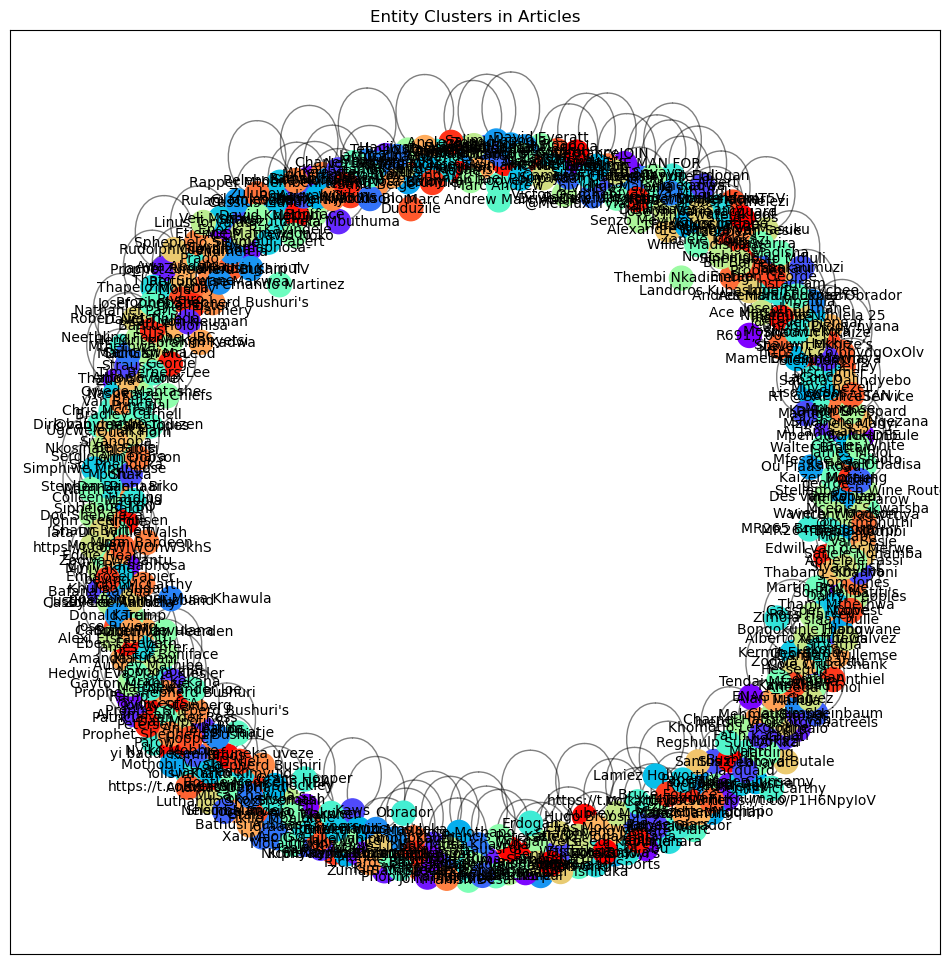

In [18]:
G = nx.Graph()

# Add nodes with cluster information
for name, cluster in zip(clusterdf['Name'], clusterdf['Cluster']):
    G.add_node(name, cluster=cluster)

# Add edges between nodes in the same cluster
for cluster_id, group in clustered_names.groupby('Cluster'):
    entities = group['Name'].tolist()
    for i in range(len(entities)):
        for j in range(i + 1, len(entities)):
            G.add_edge(entities[i], entities[j])

# Draw the graph with nodes colored by cluster
pos = nx.spring_layout(G, k=0.1)  # Position nodes using a layout algorithm
plt.figure(figsize=(12, 12))

# Use the cluster information for node colors
colors = [G.nodes[node]['cluster'] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Entity Clusters in Articles")
plt.show()